In [1]:
import requests  # An elegant and simple HTTP library
import bs4 as bs # for pulling data out of HTML and XML files
import pandas as pd
import numpy as np
import re
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [18]:
def scrapeFro():
    url = ("https://coinmarketcap.com/all/views/all/")
    r  = requests.get(url)
    r.status_code
    data = r.content
    soup = bs.BeautifulSoup(data, 'html.parser')

#print(soup.prettify())

    table = soup.table
    table_rows = table.find_all('tr')
    #print(table_rows)

    count = 0
    l = []
    for tr in table_rows:
        count += 1
        if count > 1:
            td = tr.find_all('td')
            row = [i.text.strip() for i in td]
            l.append(row)
    return l

In [19]:
crytocoins = scrapeFro()

In [20]:
col = ['no','Name','Symbol','Market_Cap','Price','Circulating_Supply','Volume(24h)','%1h','%24h','%7d','null']

In [21]:
df_allcrypto = pd.DataFrame.from_records(crytocoins, columns=col)

In [22]:
df_allcrypto = df_allcrypto.drop(df_allcrypto.columns[[0, 10]], axis=1)

In [25]:
#df_allcrypto = df_allcrypto.drop(df_allcrypto.columns[9], axis=1)

In [26]:
top_100 = df_allcrypto.loc[:100,:]

In [27]:
top_100.head()

,Name,Symbol,Market_Cap,Price,Circulating_Supply,Volume(24h),%1h,%24h,%7d
0,BTC\n\nBitcoin,BTC,"$105,003,150,026",$6136.74,"17,110,575","$4,426,940,000",-0.06%,-1.81%,-5.62%
1,ETH\n\nEthereum,ETH,"$47,359,984,824",$472.40,"100,254,627","$2,006,070,000",-0.02%,-1.17%,-5.14%
2,XRP\n\nRipple,XRP,"$19,126,238,480",$0.487351,"39,245,304,677\n*","$281,566,000",-0.31%,-2.75%,-8.44%
3,BCH\n\nBitcoin Cash,BCH,"$13,023,020,115",$757.19,"17,199,213","$532,788,000",0.10%,-2.99%,-11.17%
4,EOS\n\nEOS,EOS,"$7,428,398,216",$8.29,"896,149,492\n*","$965,080,000",-0.15%,-7.18%,-22.01%


In [28]:
top_100 = pd.DataFrame(top_100)

##Scraping the Historical prices for Bitcoin, Ethereum, Ripple and Bitcoincash

In [29]:
def scrapeFrom(topic):
    url = ("https://coinmarketcap.com/currencies" + topic)
    r  = requests.get(url)
    r.status_code
    data = r.content
    soup = bs.BeautifulSoup(data, 'html.parser')

#print(soup.prettify())

    table = soup.table
    table_rows = table.find_all('tr')
    #print(table_rows)

    count = 0
    l = []
    for tr in table_rows:
        count += 1
        if count > 1:
            td = tr.find_all('td')
            row = [i.text.strip() for i in td]
            l.append(row)
    return l

In [30]:
x1 = scrapeFrom('/bitcoin/historical-data/?start=20130428&end=20180621')
x2 = scrapeFrom('/ethereum/historical-data/?start=20130428&end=20180621')
x3 = scrapeFrom('/ripple/historical-data/?start=20130428&end=20180621')
x4 = scrapeFrom('/bitcoin-cash/historical-data/?start=20130428&end=20180621')
#https://coinmarketcap.com/currencies/bitcoin/historical-data/?start=20130428&end=20180621

In [90]:
x1[29]

['May 22, 2018',
 '8419.87',
 '8423.25',
 '8004.58',
 '8041.78',
 '5,137,010,000',
 '143,534,000,000']

In [31]:
url = 'https://coinmarketcap.com/currencies/bitcoin/historical-data/?start=20130428&end=+time.strftime("%Y%m%d"))' #'https://www.marketwatch.com/' 
r  = requests.get(url)
r.status_code
data = r.content
soup = bs.BeautifulSoup(data, 'html.parser')

#print(soup.prettify())

table = soup.table
table_rows = table.find_all('tr')
#print(table_rows)


count = 0
l1 = []
for tr in table_rows:
    if count == 0:
        th = tr.find_all('th')
        row = [i.text.strip() for i in th]
        l1.append(row)
        print(row)
        count += 1

200

['Date', 'Open*', 'High', 'Low', 'Close**', 'Volume', 'Market Cap']


In [32]:
l2 = l1[0]

In [33]:
df_bitcoin = pd.DataFrame.from_records(x1, columns=l2)

In [34]:
df_ethereum = pd.DataFrame.from_records(x2, columns=l2)

In [35]:
df_ripple = pd.DataFrame.from_records(x3, columns=l2)

In [36]:
df_bitcoin_cash = pd.DataFrame.from_records(x4, columns=l2)

In [37]:
df_bitcoin_cash.dtypes

Date          object
Open*         object
High          object
Low           object
Close**       object
Volume        object
Market Cap    object
dtype: object

In [38]:
y = [df_bitcoin,df_ethereum,df_ripple,df_bitcoin_cash]
for i in range(0,len(y)):
    y[i][['Open*','High','Low','Close**']] = y[i][['Open*','High','Low','Close**']].apply(pd.to_numeric)
    y[i]['Date'] = pd.to_datetime(y[i]['Date'])
    y[i]['year'], y[i]['month'] = y[i]['Date'].dt.year, y[i]['Date'].dt.month

In [39]:
df_bitcoin = y[0]
df_ethereum = y[1]
df_ripple = y[2]
df_bitcoin_cash = y[3]

In [40]:
df_bitcoin.head()

,Date,Open*,High,Low,Close**,Volume,Market Cap,year,month
0,2018-06-21,6780.09,6810.94,6715.17,6729.74,"3,529,130,000","115,977,000,000",2018,6
1,2018-06-20,6770.76,6821.56,6611.88,6776.55,"3,888,640,000","115,804,000,000",2018,6
2,2018-06-19,6742.39,6822.50,6709.92,6769.94,"4,057,030,000","115,306,000,000",2018,6
3,2018-06-18,6510.07,6781.14,6446.68,6734.82,"4,039,200,000","111,319,000,000",2018,6
4,2018-06-17,6545.53,6589.11,6499.27,6499.27,"3,104,020,000","111,913,000,000",2018,6


In [41]:
df_bitcoin.dtypes

Date          datetime64[ns]
Open*                float64
High                 float64
Low                  float64
Close**              float64
Volume                object
Market Cap            object
year                   int64
month                  int64
dtype: object

In [42]:
df_bitcoin.head(3)

,Date,Open*,High,Low,Close**,Volume,Market Cap,year,month
0,2018-06-21,6780.09,6810.94,6715.17,6729.74,"3,529,130,000","115,977,000,000",2018,6
1,2018-06-20,6770.76,6821.56,6611.88,6776.55,"3,888,640,000","115,804,000,000",2018,6
2,2018-06-19,6742.39,6822.50,6709.92,6769.94,"4,057,030,000","115,306,000,000",2018,6


In [43]:
df_ripple.head(3)

,Date,Open*,High,Low,Close**,Volume,Market Cap,year,month
0,2018-06-21,0.539228,0.547007,0.530697,0.534775,"194,312,000","21,162,200,000",2018,6
1,2018-06-20,0.549738,0.550554,0.525859,0.539286,"256,920,000","21,574,600,000",2018,6
2,2018-06-19,0.538614,0.558059,0.534595,0.549621,"255,400,000","21,138,100,000",2018,6


In [44]:
df_bitcoin.to_csv('df_bitcoin.csv')
df_ethereum.to_csv('df_ethereum.csv')
df_ripple.to_csv('df_ripple.csv')
df_bitcoin_cash.to_csv('df_bitcoin_cash.csv')

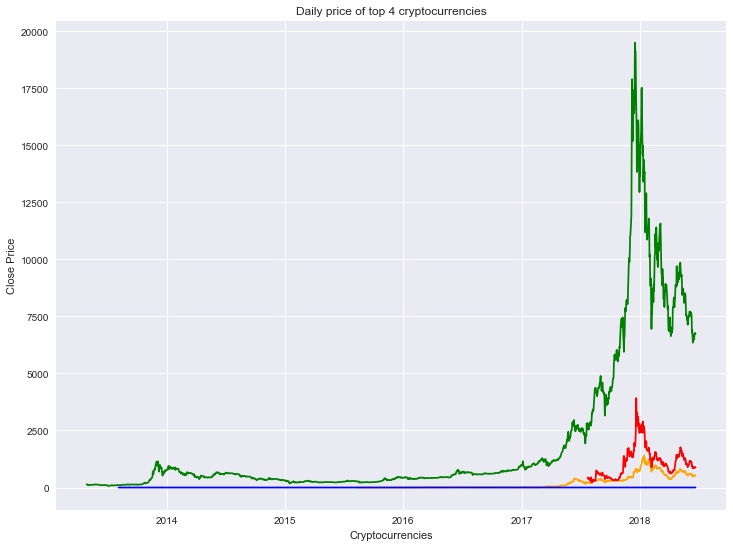

In [45]:
#Line chart
fig,ax = plt.subplots(figsize = (12,9))
plt.plot(df_bitcoin['Date'], df_bitcoin['Close**'], color='g')
plt.plot(df_ethereum['Date'], df_ethereum['Close**'], color='orange')
plt.plot(df_ripple['Date'], df_ripple['Close**'], color='blue')
plt.plot(df_bitcoin_cash['Date'], df_bitcoin_cash['Close**'], color='red')
plt.xlabel('Cryptocurrencies')
plt.ylabel('Close Price')
plt.title('Daily price of top 4 cryptocurrencies')
plt.show()

In [46]:
df_mcap = pd.DataFrame(df_bitcoin['Market Cap'])
df_mcap['ethereum'] = pd.DataFrame(df_ethereum['Market Cap'])
df_mcap['bitcoin_cash'] = pd.DataFrame(df_bitcoin_cash['Market Cap'])
df_mcap['ripple'] = pd.DataFrame(df_ripple['Market Cap'])

In [47]:
df_mcap.rename(columns={'Market Cap': 'bitcoin'}, inplace=True)

In [48]:
# when Volume is equal to '-' convert it to 0
df_mcap.loc[df_mcap['bitcoin']=="-",'bitcoin']=0

In [57]:
#ANOVA Analysis of four top cryptocurrencies

In [49]:
df_bitcoin_18 = df_bitcoin[df_bitcoin['year'] == 2018] 
df_bitcoin_18

,Date,Open*,High,Low,Close**,Volume,Market Cap,year,month
0,2018-06-21,6780.09,6810.94,6715.17,6729.74,"3,529,130,000","115,977,000,000",2018,6
1,2018-06-20,6770.76,6821.56,6611.88,6776.55,"3,888,640,000","115,804,000,000",2018,6
2,2018-06-19,6742.39,6822.50,6709.92,6769.94,"4,057,030,000","115,306,000,000",2018,6
3,2018-06-18,6510.07,6781.14,6446.68,6734.82,"4,039,200,000","111,319,000,000",2018,6
4,2018-06-17,6545.53,6589.11,6499.27,6499.27,"3,104,020,000","111,913,000,000",2018,6
5,2018-06-16,6455.45,6592.49,6402.29,6550.16,"3,194,170,000","110,359,000,000",2018,6
6,2018-06-15,6674.08,6681.08,6433.87,6456.58,"3,955,390,000","114,084,000,000",2018,6
7,2018-06-14,6342.75,6707.14,6334.46,6675.35,"5,138,710,000","108,408,000,000",2018,6
8,2018-06-13,6596.88,6631.66,6285.63,6349.90,"5,052,350,000","112,740,000,000",2018,6
9,2018-06-12,6905.82,6907.96,6542.08,6582.36,"4,654,380,000","118,007,000,000",2018,6


In [50]:
df_ripple_18 = df_ripple[df_ripple['year'] == 2018] 

In [51]:
df_ethereum_18 = df_ethereum[df_ethereum['year'] == 2018] 

In [52]:
df_bitcoin_cash_18 = df_bitcoin_cash[df_bitcoin_cash['year'] == 2018] 

In [53]:
df_bitcoin_18['daily return'] = (df_bitcoin_18['Close**'] - df_bitcoin_18['Open*'])/df_bitcoin_18['Open*']
df_ripple_18['daily return'] = (df_ripple_18['Close**'] - df_ripple_18['Open*'])/df_ripple_18['Open*']
df_ethereum_18['daily return'] = (df_ethereum_18['Close**'] - df_ethereum_18['Open*'])/df_ethereum_18['Open*']
df_bitcoin_cash_18['daily return'] = (df_bitcoin_cash_18['Close**'] - df_bitcoin_cash_18['Open*'])/df_bitcoin_cash_18['Open*']

In [54]:
import statistics

In [55]:
df_stats = pd.DataFrame(df_bitcoin_18['daily return'])

In [56]:
df_stats.rename(columns={'daily return': 'bitcoin'}, inplace=True)

In [57]:
df_stats['bitcoin'].mean()

-0.003245142845082551

In [58]:
df_stats['ripple'] = df_ripple_18['daily return']

In [59]:
df_stats['ethereum'] = df_ethereum_18['daily return']
df_stats['bitcoin_cash'] = df_bitcoin_cash_18['daily return']

In [60]:
df_stats['bitcoin'] = df_stats['bitcoin'].apply(lambda x: x*100)
df_stats['ripple'] = df_stats['ripple'].apply(lambda x: x*100)
df_stats['ethereum'] = df_stats['ethereum'].apply(lambda x: x*100)
df_stats['bitcoin_cash'] = df_stats['bitcoin_cash'].apply(lambda x: x*100)

In [61]:
df_stats  ##172 samples

,bitcoin,ripple,ethereum,bitcoin_cash
0,-0.742616,-0.825810,-1.692609,-1.858214
1,0.085515,-1.901269,-0.415963,-1.684866
2,0.408609,2.043579,3.649185,2.106119
3,3.452344,1.640445,3.906844,4.216237
4,-0.706742,-1.366855,0.198214,-0.112536
5,1.467132,-0.432317,1.882099,0.593749
6,-3.258876,-3.991522,-5.664002,-5.255290
7,5.243782,4.831772,8.645846,6.305367
8,-3.743891,-5.007062,-4.122324,-3.723386
9,-4.683875,-6.510655,-6.733495,-8.641369


In [62]:
#correlation matrix
correlation = df_stats.corr(method='pearson')
correlation

,bitcoin,ripple,ethereum,bitcoin_cash
bitcoin,1.000000,0.695727,0.813283,0.793976
ripple,0.695727,1.000000,0.728771,0.637046
ethereum,0.813283,0.728771,1.000000,0.748101
bitcoin_cash,0.793976,0.637046,0.748101,1.000000


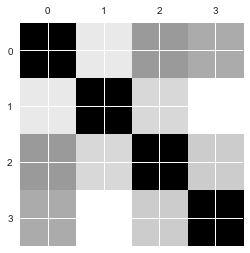

In [63]:
plt.matshow(df_stats.corr())


In [64]:
eth_mean = df_stats['ethereum'].mean()
rip_mean = df_stats['ripple'].mean()
bcash_mean=df_stats['bitcoin_cash'].mean()
bitc_mean = df_stats['bitcoin'].mean()

In [65]:
print("%s is ethereum mean" %(eth_mean))
print("%s is ripple mean" %(rip_mean))
print("%s is bitcoin-cash mean" %(bcash_mean))
print("%s is bitcoin mean" %(bitc_mean))

-0.07128486099474333 is ethereum mean
-0.5740067123932519 is ripple mean
-0.32242627893095455 is bitcoin-cash mean
-0.3245142845082551 is bitcoin mean


In [66]:
eth_std = df_stats['ethereum'].std()
rip_std = df_stats['ripple'].std()
bcash_std = df_stats['bitcoin_cash'].std()
bitc_std = df_stats['bitcoin'].std()

In [67]:
print("%s is ethereum std dev" %(eth_std))
print("%s is ripple std dev" %(rip_std))
print("%s is bitcoin-cash std dev" %(bcash_std))
print("%s is bitcoin std dev" %(bitc_std))

5.997602156069697 is ethereum std dev
7.50505884884237 is ripple std dev
7.728007610164524 is bitcoin-cash std dev
4.990637261693937 is bitcoin std dev


In [68]:
eth_var = eth_std*eth_std
rip_var = rip_std*rip_std
bcash_var = bcash_std*bcash_std
bitc_var = (bitc_std)*(bitc_std)

In [ ]:
##Average Daily return of Ethereum is highest but variance of Bitcoin is lowest
# If we test the equality of variance of Bitcoin and Ethereum, we can find out the cryptocurrency which give highest returns at lowest variance
# We will perform F-test

In [124]:
#Null Hypothesis - Variance of Ripple and Bitcoin is same
#Alternative Hypothesis - Variance of Ripple and Bitcoin are same

In [69]:
F_test = (eth_var/bitc_var)

In [70]:
import scipy.stats as stats
alpha = 0.05 #Or whatever you want your alpha to be.
p_value = stats.f.cdf(F_test, 170, 170)
if p_value < alpha:
    print(" Reject the null hypothesis that Var(X) != Var(Y)")
else:
    print("Fail to reject null hypothesis that Var(X) == Var(Y)")

Fail to reject null hypothesis that Var(X) == Var(Y)


In [ ]:
#Conclusion - Variance of Ripple and Bitcoin is same.
#Hence, to get highest returns at lowest variance , choose Ethereum
#Ethereum cryptocurrency is better than other four currencies a

In [71]:
import scipy.stats as stats

In [ ]:
#Null Hypothesis - mean of daily returns of all cryptocurrencies are equal
#Alternative Hypothesis - mean of daily returns of at least one cryptocurrencies is different

In [72]:
stats.f_oneway(df_stats['bitcoin'], df_stats['ripple'], df_stats['ethereum'], df_stats['bitcoin_cash'])

F_onewayResult(statistic=0.16379913893317263, pvalue=0.92073735449778527)

In [ ]:
#Conclusion - We will accept Null Hypothesis as probability of error of making Type-1 error is 0.92

(array([  2.,   1.,   4.,   5.,   8.,  17.,  24.,  34.,  29.,  20.,   8.,
          9.,   7.,   4.]),
 array([-18.48479457, -16.12198285, -13.75917113, -11.39635942,
         -9.0335477 ,  -6.67073598,  -4.30792427,  -1.94511255,
          0.41769916,   2.78051088,   5.1433226 ,   7.50613431,
          9.86894603,  12.23175775,  14.59456946]),
 <a list of 14 Patch objects>)

(array([  2.,   0.,   0.,   8.,   4.,  12.,  22.,  28.,  34.,  27.,  17.,
          7.,   4.,   5.,   2.]),
 array([-16.95275403, -14.92746477, -12.90217551, -10.87688624,
         -8.85159698,  -6.82630772,  -4.80101846,  -2.7757292 ,
         -0.75043994,   1.27484932,   3.30013858,   5.32542784,
          7.35071711,   9.37600637,  11.40129563,  13.42658489]),
 <a list of 15 Patch objects>)

(array([  1.,   1.,   0.,   0.,   1.,   1.,   4.,   7.,   9.,  26.,  21.,
         36.,  29.,  10.,   9.,   6.,   5.,   1.,   2.,   1.,   1.,   1.]),
 array([-29.76190476, -27.20805617, -24.65420758, -22.10035899,
        -19.5465104 , -16.99266181, -14.43881322, -11.88496463,
         -9.33111604,  -6.77726745,  -4.22341886,  -1.66957027,
          0.88427832,   3.43812691,   5.9919755 ,   8.54582409,
         11.09967269,  13.65352128,  16.20736987,  18.76121846,
         21.31506705,  23.86891564,  26.42276423]),
 <a list of 22 Patch objects>)

(array([  2.,   0.,   0.,   2.,   5.,   7.,  18.,  26.,  34.,  31.,  15.,
         15.,   8.,   3.,   3.,   1.,   1.,   0.,   0.,   0.,   1.]),
 array([-26.37419709, -23.45191403, -20.52963097, -17.60734791,
        -14.68506485, -11.76278179,  -8.84049873,  -5.91821567,
         -2.99593261,  -0.07364955,   2.84863351,   5.77091657,
          8.69319963,  11.61548269,  14.53776575,  17.46004882,
         20.38233188,  23.30461494,  26.226898  ,  29.14918106,
         32.07146412,  34.99374718]),
 <a list of 21 Patch objects>)

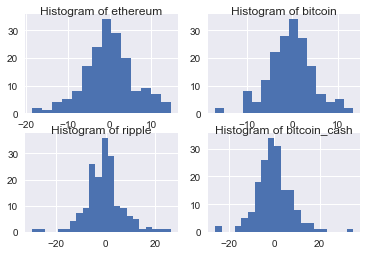

In [73]:
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import rcParams
rcParams['axes.titlepad'] = 0.1 
plt.subplot(221)
plt.hist(df_stats['ethereum'], bins='auto')  # arguments are passed to np.histogram
plt.title("Histogram of ethereum")
plt.subplot(222)
plt.hist(df_stats['bitcoin'], bins='auto')  # arguments are passed to np.histogram
plt.title("Histogram of bitcoin")
plt.subplot(223)
plt.hist(df_stats['ripple'], bins='auto')  # arguments are passed to np.histogram
plt.title("Histogram of ripple")
plt.subplot(224)
plt.hist(df_stats['bitcoin_cash'], bins='auto')  # arguments are passed to np.histogram
plt.title("Histogram of bitcoin_cash")

In [74]:
df_bitcoin.rename(columns={'Open*': 'Open'}, inplace=True)
df_bitcoin.rename(columns={'Close**': 'Close'}, inplace=True)

In [79]:
df_bitcoin_30  = df_bitcoin.iloc[:30,:]

In [75]:
import plotly
plotly.tools.set_credentials_file(username='vin725k', api_key='qZhPaNKbCeQTKHQAsCU6')

In [81]:

import plotly.plotly as py
import plotly.graph_objs as go

import pandas_datareader as web
from datetime import datetime

df = web.DataReader("aapl", 'morningstar').reset_index()

trace = go.Candlestick(x=df_bitcoin_30.Date,
                       open=df_bitcoin_30.Open,
                       high=df_bitcoin_30.High,
                       low=df_bitcoin_30.Low,
                       close=df_bitcoin_30.Close,
                       increasing=dict(line=dict(color= '#17BECF')),
                       decreasing=dict(line=dict(color= '#7F7F7F')))
data = [trace]
py.iplot(data, filename='styled_candlestick')

In [77]:

data = [go.Scatter( x=df_bitcoin['Date'], y=df_bitcoin['Close'] )]

py.iplot(data, filename='pandas-time-series')

In [ ]:
##COMPARING THE LOW AND HIGH POINTS WITH THE SENTIMENT SCORE FROM ARTICLES OF THOSE DAYS

In [82]:
from selenium import webdriver
from selenium.webdriver.common.keys import Keys 
from bs4 import BeautifulSoup
import requests 
import bs4 as bs 

In [83]:
import re

def clean(raw_html):
    clean1 = re.compile('<.*?>')
    cleantxt = re.sub(clean1, '', raw_html)
    return cleantxt

In [84]:
driver = webdriver.Chrome("C:/Users/Vineet/Documents/ISB-H/Big data collection/group assign/chromedriver")

In [85]:
driver.get("https://nulltx.com/down-we-go-38-billion-evaporated-as-bitcoin-altcoins-net-double-digit-losses/")

In [86]:
pagesrc = driver.page_source
soup_obj = BeautifulSoup(pagesrc, "lxml")
topic_11_june = soup_obj.find_all("p")
topic_11_june

[<p><strong>For those calling for the end of the bear cycle- hold tight a little longer. Following the extended sideways market movements, a price explosion was imminent. Unfortunately, this action took place in favor of sellers, as Bitcoin continues to tumble over the course of the past 24 hours. Altcoins have similarly followed suit.</strong></p>,
 <p>Last night, Bitcoin’s channel between US$7,500 and $7,700 broke, as the king of cryptocurrency saw a steep decline of $300 down to the $7,300 mark. After a gradual decline to $7,200 overnight, a second sell off has just been encountered. Within the past two hours, BTC saw an even larger, $400 drop, knocking the coin down to US$6,850.</p>,
 <p><img class="aligncenter td-animation-stack-type0-1" height="439" src="https://www.tradingview.com/x/AmjoSNTx/" width="601"/></p>,
 <p>Unfortunately, this dump has not been mitigated by altcoins. In fact, alts across the board are faring even worse than Bitcoin. Of the top 100 cryptos listed on Coin

In [89]:
from textblob import TextBlob

In [ ]:
topic_11_june = clean(topic_11_june)

In [93]:
topic_11_june = str(topic_11_june)
test1 = TextBlob(topic_11_june)
print(test1)

[For those calling for the end of the bear cycle- hold tight a little longer. Following the extended sideways market movements, a price explosion was imminent. Unfortunately, this action took place in favor of sellers, as Bitcoin continues to tumble over the course of the past 24 hours. Altcoins have similarly followed suit., Last night, Bitcoin’s channel between US$7,500 and $7,700 broke, as the king of cryptocurrency saw a steep decline of $300 down to the $7,300 mark. After a gradual decline to $7,200 overnight, a second sell off has just been encountered. Within the past two hours, BTC saw an even larger, $400 drop, knocking the coin down to US$6,850., , Unfortunately, this dump has not been mitigated by altcoins. In fact, alts across the board are faring even worse than Bitcoin. Of the top 100 cryptos listed on Coinmarketcap, just 15 have seen gains against BTC in the same time frame as the dump. Excluding Tether, which remains pegged to US$1.00, Monacoin is performing the best wi

In [94]:
# POSTagging with the blob
tags_list = test1.tags  # penn treebank style tags
print(tags_list[:19])

[('[', 'NN'), ('For', 'IN'), ('those', 'DT'), ('calling', 'VBG'), ('for', 'IN'), ('the', 'DT'), ('end', 'NN'), ('of', 'IN'), ('the', 'DT'), ('bear', 'JJ'), ('cycle-', 'JJ'), ('hold', 'NN'), ('tight', 'VBD'), ('a', 'DT'), ('little', 'JJ'), ('longer', 'JJR'), ('Following', 'VBG'), ('the', 'DT'), ('extended', 'JJ')]


In [95]:
# Sentiment-an with textblob
## yields polarity between (-1,1) & a measure of subjectivity (0 to 1)
test1.sentiment  # subjectivity = 0 means fully objective sentence.
print("\n")
for sentence in test1.sentences:
    x = sentence.sentiment

Sentiment(polarity=0.05106593142307427, subjectivity=0.3551621658764516)

In [96]:
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
from stop_words import get_stop_words
from nltk.stem.porter import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer
import string
import pandas as pd


In [97]:
tokenizer = RegexpTokenizer(r'\w+')

# create English stop words list
#en_stop = get_stop_words('en')
stop = set(stopwords.words('english'))
lemma = WordNetLemmatizer()
# list for tokenized documents in loop
cleaned_text = []  
# clean and tokenize document string
raw = topic_11_june.lower()
tokens = tokenizer.tokenize(raw)

    # remove stop words from tokens
    #stopped_tokens = [i for i in tokens if not i in en_stop]
stopped_tokens = [i for i in tokens if not i in stop]
    
    # stem tokens
stemmed_tokens = [lemma.lemmatize(i) for i in stopped_tokens]
    
    #remove single letters
    #stemmed_tokens = [w for w in stemmed_tokens if re.sub('(\\b[A-Za-z] \\b|\\b [A-Za-z]\\b)','',stemmed_tokens)]
    
    #remove number
    #stemmed_tokens = [w for w in stemmed_tokens if re.sub(r'\d+',stemmed_tokens)]
    
    
    # add tokens to list
cleaned_text.append(stemmed_tokens)

In [104]:
str1 = ''.join(str(i) for i in cleaned_text)

In [109]:
driver.get("https://ambcrypto.com/bitcoin-btc-eos-the-showstoppers-sentiment-analysis-june-10/")

In [114]:
pagesrc = driver.page_source
soup_obj = BeautifulSoup(pagesrc, "lxml")
topic_10_june = soup_obj.find_all("p")


In [115]:
topic_10_june= str(topic_10_june)
topic_10_june=clean(topic_10_june)

In [116]:
topic_10_june = str(topic_10_june)
test2 = TextBlob(topic_10_june)

In [117]:
# Sentiment-an with textblob
## yields polarity between (-1,1) & a measure of subjectivity (0 to 1)
test2.sentiment  # subjectivity = 0 means fully objective sentence.
print("\n")
for sentence in test2.sentences:
    y = sentence.sentiment

Sentiment(polarity=0.09440369154654868, subjectivity=0.46304411857983313)

In [121]:
driver.get("http://fortune.com/2018/04/13/bitcoin-price-tax-day-2018/")

In [122]:
pagesrc = driver.page_source
soup_obj = BeautifulSoup(pagesrc, "lxml")
topic_13_may = soup_obj.find_all("p")
topic_13_may= str(topic_13_may)
topic_13_may=clean(topic_13_may)
test3 = TextBlob(topic_13_may)

In [123]:
# Sentiment-an with textblob
## yields polarity between (-1,1) & a measure of subjectivity (0 to 1)
test3.sentiment  # subjectivity = 0 means fully objective sentence.
print("\n")
for sentence in test3.sentences:
    z = sentence.sentiment

Sentiment(polarity=0.11824085526466481, subjectivity=0.42834610275086465)